In [1]:
import pymysql
import pandas as pd
import json
from model.db_loader import MySQL

sql_db = MySQL(key_file='../keys/localhost_sql_key.json',
               database='crawl_job')
with open('model/dtype_map.json') as file :
    dtype_map = json.load(file)

def get_dataframe(column) :
    db = sql_db.get_cursor()
    sql = f"select job_detail.id, job_detail.{column} from job_detail ;"
    db.execute(sql)
    return pd.DataFrame(db.fetchall(),columns=['id',column])

In [2]:
df_title = get_dataframe('title')
df_skills = get_dataframe('skill_tag')

In [3]:
df_title

,id,title
0,20,Node.js Backend 개발자
1,21,[단비] Node.js / React / Typescript 개발자를 모십니다!
2,22,Java 개발 (비즈니스플랫폼)
3,23,"[Coupang Pay] Principal, Technical Program Man..."
4,24,[핀테크]파운트 Full-Stack Engineer
...,...,...
3476,4448,웹 프론트엔드 개발자
3477,4449,"백엔드 개발자 (JAVA, SPRING)"
3478,4450,백엔드 개발자
3479,4451,프론트엔드 개발자 (React.js)


In [4]:
df_skills

,id,skill_tag
0,20,None
1,21,"NOSQL,MONGODB,PYTHON,NODE JS,AMAZON AWS,DJANGO..."
2,22,None
3,23,None
4,24,None
...,...,...
3476,4448,"JAVASCRIPT,CSS,HTML,VUE.JS"
3477,4449,"GIT,SPRING,MYSQL,JAVA"
3478,4450,"APACHE KAFKA,RABBITMQ,APACHE,PHP,PYTHON,NGINX,..."
3479,4451,"AWS S3,AWS EC2,JQUERY,ES6,REACTJS,JAVASCRIPT"


In [5]:
df_title.to_csv('job_title.csv',index=False,columns=['id','title'])

In [6]:
label_df_title = pd.read_csv('job_title_label.csv')

In [7]:
label_df_title

,label,title
0,Back-end,Node.js Backend 개발자
1,WEB/Full-stack,[단비] Node.js / React / Typescript 개발자를 모십니다!
2,JAVA-dev,Java 개발 (비즈니스플랫폼)
3,CTO,"[Coupang Pay] Principal, Technical Program Man..."
4,WEB/Full-stack,[핀테크]파운트 Full-Stack Engineer
...,...,...
3476,Front-end,웹 프론트엔드 개발자
3477,JAVA-dev,"백엔드 개발자 (JAVA, SPRING)"
3478,Back-end,백엔드 개발자
3479,Front-end,프론트엔드 개발자 (React.js)


In [8]:
labels = pd.read_csv('label.csv').set_index('label')
labels

,index
label,
Back-end,0
Front-end,1
WEB/Full-stack,2
Android,3
IOS,4
Mobile,5
Data-analyst,6
Data-engineer,7
Data-scientist,8


In [9]:
total_df = pd.DataFrame({
    'id':df_title['id'],
    'title':df_title['title'],
    'sector':label_df_title['label'],
    'skill_tag':df_skills['skill_tag']
})
total_df

,id,title,sector,skill_tag
0,20,Node.js Backend 개발자,Back-end,None
1,21,[단비] Node.js / React / Typescript 개발자를 모십니다!,WEB/Full-stack,"NOSQL,MONGODB,PYTHON,NODE JS,AMAZON AWS,DJANGO..."
2,22,Java 개발 (비즈니스플랫폼),JAVA-dev,None
3,23,"[Coupang Pay] Principal, Technical Program Man...",CTO,None
4,24,[핀테크]파운트 Full-Stack Engineer,WEB/Full-stack,None
...,...,...,...,...
3476,4448,웹 프론트엔드 개발자,Front-end,"JAVASCRIPT,CSS,HTML,VUE.JS"
3477,4449,"백엔드 개발자 (JAVA, SPRING)",JAVA-dev,"GIT,SPRING,MYSQL,JAVA"
3478,4450,백엔드 개발자,Back-end,"APACHE KAFKA,RABBITMQ,APACHE,PHP,PYTHON,NGINX,..."
3479,4451,프론트엔드 개발자 (React.js),Front-end,"AWS S3,AWS EC2,JQUERY,ES6,REACTJS,JAVASCRIPT"


In [10]:
total_df = pd.DataFrame({
    'id':df_title['id'],
    'title':df_title['title'],
    'sector':label_df_title['label'],
    'sector_label':[labels.loc[label,'index'] for label in total_df['sector']],
    'skill_tag':df_skills['skill_tag']
})
total_df

,id,title,sector,sector_label,skill_tag
0,20,Node.js Backend 개발자,Back-end,0,None
1,21,[단비] Node.js / React / Typescript 개발자를 모십니다!,WEB/Full-stack,2,"NOSQL,MONGODB,PYTHON,NODE JS,AMAZON AWS,DJANGO..."
2,22,Java 개발 (비즈니스플랫폼),JAVA-dev,21,None
3,23,"[Coupang Pay] Principal, Technical Program Man...",CTO,19,None
4,24,[핀테크]파운트 Full-Stack Engineer,WEB/Full-stack,2,None
...,...,...,...,...,...
3476,4448,웹 프론트엔드 개발자,Front-end,1,"JAVASCRIPT,CSS,HTML,VUE.JS"
3477,4449,"백엔드 개발자 (JAVA, SPRING)",JAVA-dev,21,"GIT,SPRING,MYSQL,JAVA"
3478,4450,백엔드 개발자,Back-end,0,"APACHE KAFKA,RABBITMQ,APACHE,PHP,PYTHON,NGINX,..."
3479,4451,프론트엔드 개발자 (React.js),Front-end,1,"AWS S3,AWS EC2,JQUERY,ES6,REACTJS,JAVASCRIPT"


In [11]:
total_df['sector'].value_counts()

Back-end             723
Front-end            618
DevOps               231
Anonymous            211
IOS                  202
Android              194
WEB/Full-stack       193
Data-engineer        150
Mobile               148
Machine-learning     125
JAVA-dev             110
QA/QC                 74
CTO                   72
PHP-dev               57
Computer-vision       55
Block-chain           44
Data-scientist        43
Data-analyst          39
Web-publisher         38
Embedded/Robotics     28
Project-manager       28
C#/C++/C              27
Unity/AR/VR/3D        25
Security              23
Game                  20
Hardware               3
Name: sector, dtype: int64

<AxesSubplot:ylabel='sector'>

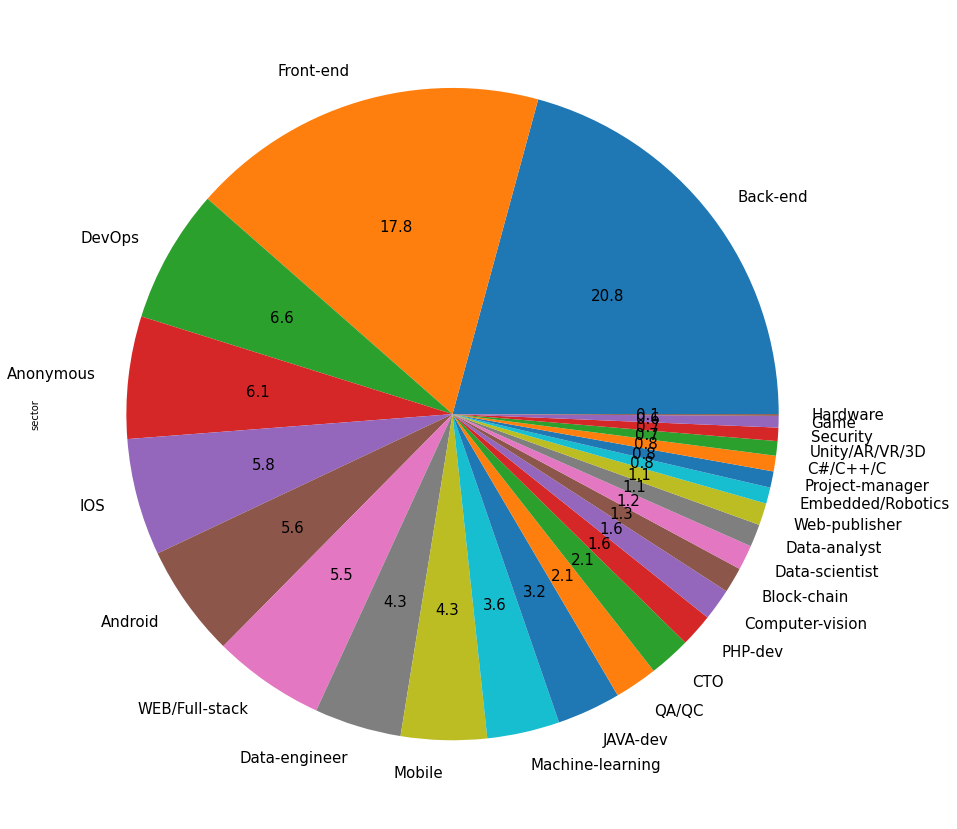

In [12]:
total_df['sector'].value_counts().plot.pie(figsize=(15,15),autopct="%.1f",fontsize=15)

In [13]:
total_df['sector'].value_counts()

Back-end             723
Front-end            618
DevOps               231
Anonymous            211
IOS                  202
Android              194
WEB/Full-stack       193
Data-engineer        150
Mobile               148
Machine-learning     125
JAVA-dev             110
QA/QC                 74
CTO                   72
PHP-dev               57
Computer-vision       55
Block-chain           44
Data-scientist        43
Data-analyst          39
Web-publisher         38
Embedded/Robotics     28
Project-manager       28
C#/C++/C              27
Unity/AR/VR/3D        25
Security              23
Game                  20
Hardware               3
Name: sector, dtype: int64

In [14]:
tmp = []
for tag in total_df['skill_tag'] :
    if tag is not None :
        tmp += tag.split(',')

In [18]:
pd.Series(tmp).value_counts().head(20)

JAVASCRIPT    749
JAVA          678
PYTHON        592
MYSQL         500
NODE.JS       476
BACK-END      468
GIT           435
AMAZON AWS    430
FRONT-END     411
REACT         375
ANDROID       341
IOS           311
CSS           253
GITHUB        228
TYPESCRIPT    220
HTML          213
VUE.JS        207
풀스택개발         200
PHP           188
영어            183
dtype: int64

<AxesSubplot:>

/home/keyog/coding/WhyDoThat/analysis/anal-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/keyog/coding/WhyDoThat/analysis/anal-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/keyog/coding/WhyDoThat/analysis/anal-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/keyog/coding/WhyDoThat/analysis/anal-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/keyog/coding/WhyDoThat/analysis/anal-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53469 missing from current font.
  

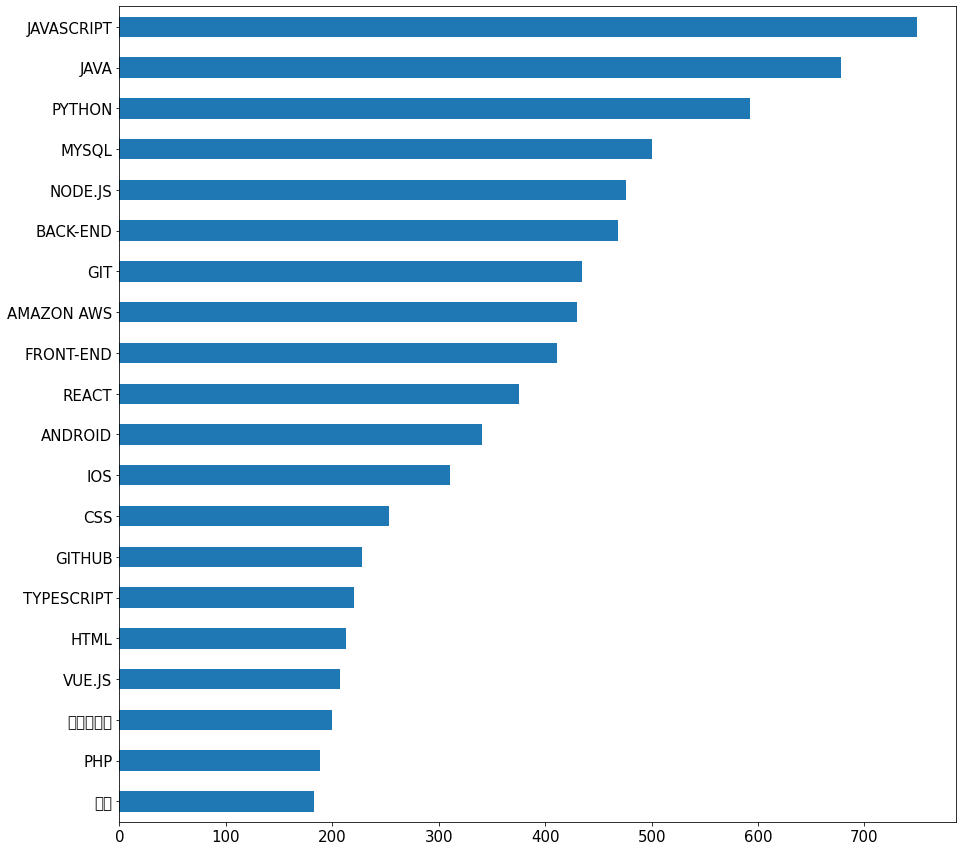

In [16]:
pd.Series(tmp).value_counts().head(20)[::-1].plot.barh(figsize=(15,15),fontsize=15)

In [17]:
total_df.to_csv('total_df.csv',index=False)